In [1]:
import numpy as np
from PIL import Image, ImageDraw
import matplotlib.pyplot as plt


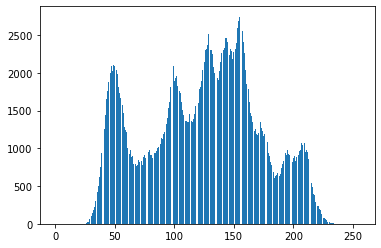

In [2]:
# (a) original image and its histogram

img = Image.open("lena.bmp")
width, height = img.size

x = np.arange(256)
y = np.zeros(256)
for c in range(width):
    for r in range(height):
        y[img.getpixel((c,r))] +=1
plt.bar(x,y)
plt.show()

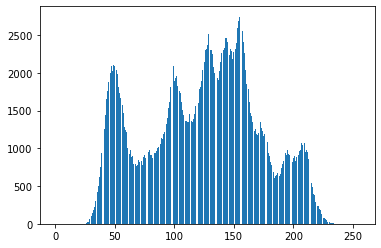

In [3]:
# (b) image with intensity divided by 3 and its histogram

original = Image.open("lena.bmp")
width, height = img.size

x = np.arange(256)
dividedHistogram = np.zeros(256)

for c in range(width):
    for r in range(height):
        index = round(img.getpixel((c,r))/3)
        dividedHistogram[index] +=1
        
dividedImage = Image.new("L", original.size)
dividedImageArray = dividedImage.load()

for c in range(width):
    for r in range(height):
        dividedImageArray[c,r] = round(img.getpixel((c,r))/3)
        
dividedImage.save("DividedImage.bmp")
dividedImage.show()
plt.bar(x,y)
plt.show()

In [5]:
# (c) image after applying histogram equalization to (b) and its histogram

# load basic parameter
dividedImage = Image.open("DividedImage.bmp")
width, height = dividedImage.size
totalNumberOfPixels = width * height


s = np.zeros(256)
dividedImageHis = np.zeros(256)

# get divided image histogram count
for c in range(width):
    for r in range(height):
        dividedImageHis[dividedImage.getpixel((c,r))] += 1

# calculate the equalization histogram
for i in range(256):
    accumulation[i] = np.sum(dividedImageHis[0:i+1])
    s[i] = accumulation[i] * 255 / totalNumberOfPixels

# make new equalizedImage 
equalizedImage = Image.new("L", dividedImage.size)
for c in range(width):
    for r in range(height):
        equalizedImage.putpixel((c,r), int(s[dividedImage.getpixel((c,r))]))
equalizedImage.save("EqualizeedImage.bmp")
equalizedImage.show()    

# make the histogram of equalization image
equalizedHis = np.zeros(256)
for c in range(width):
    for r in range(height):
        equalizedHis[equalizedImage.getpixel((c,r))] += 1

plt.bar(x,equalizedHis)
plt.show()

NameError: name 'accumulation' is not defined